<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/M%C3%A9tododeC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = sp.symbols('x') # variable
u = sp.Function('u') # función

Para resolver la ecuación (poner la ecuación)

In [8]:
ode = u(x).diff(x,x) + u(x) + x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

In [11]:
sol = sp.dsolve(ode, ics={u(0):0,u(1):0}) # ics es un diccionario

In [10]:
sol

Eq(u(x), -x + sin(x)/sin(1))

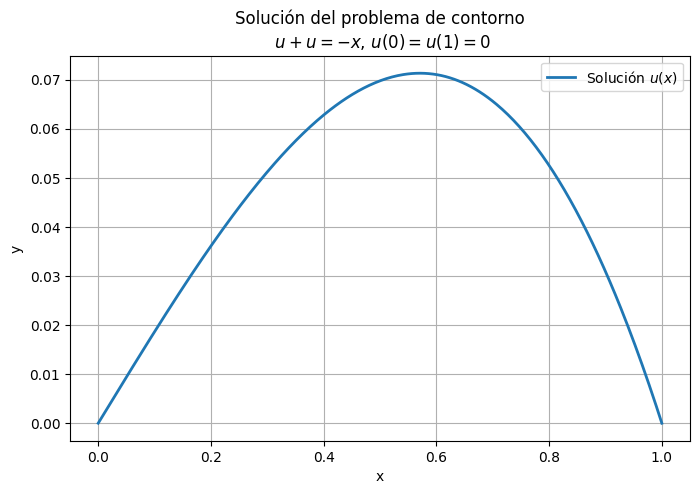

In [15]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u'' + u=-x$, $u(0)=u(1)=0$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
a,b=sp.symbols('a b')

u_n= a*x*(1-x)+b*x**2*(1-x)

In [19]:
u_n

a*x*(1 - x) + b*x**2*(1 - x)

In [18]:
u_n_2=sp.diff(u_n,x,2)

F=u_n_2+u_n

In [20]:
F

a*x*(1 - x) + b*x**2*(1 - x) - 2*(a + 2*b*x + b*(x - 1))

In [21]:
points=[sp.Rational(1/4), sp.Rational(1,2)]

In [22]:
points

[1/4, 1/2]

In [25]:
eqs=[sp.Eq(F.subs(x,p),-p) for p in points]

sol_1=sp.solve(eqs,[a, b])

In [28]:
for eq in eqs:
    print(eq)

Eq(-29*a/16 + 35*b/64, -1/4)
Eq(-7*a/4 - 7*b/8, -1/2)


In [31]:
print("Sistema de ecuaciones simbólico:")
for eq in eqs:
    sp.pprint(eq)

Sistema de ecuaciones simbólico:
  29⋅a   35⋅b       
- ──── + ──── = -1/4
   16     64        
  7⋅a   7⋅b       
- ─── - ─── = -1/2
   4     8        


In [32]:
sol_1

{a: 6/31, b: 40/217}

In [33]:
u_approx=u_n.subs(sol_1)

In [34]:
u_approx

40*x**2*(1 - x)/217 + 6*x*(1 - x)/31

In [35]:
u_approx_fn=sp.lambdify(x,u_approx,"numpy")

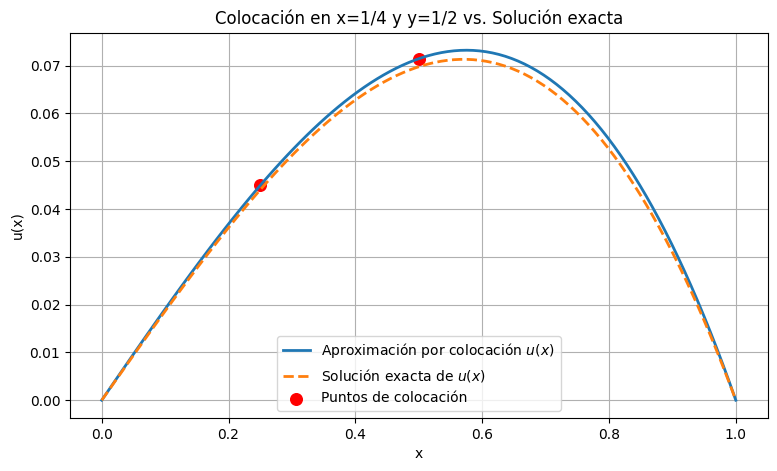

In [42]:
xx=np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación $u(x)$", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta de $u(x)$", linewidth=2)

plt.scatter([0.25,0.5], u_approx_fn(np.array([0.25,0.5])),
            color="red", s=70, label="Puntos de colocación")


plt.title('Colocación en x=1/4 y y=1/2 vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()